In [1]:
# Step 1: Import Libraries
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from google.colab import files # type: ignore

# Step 2: Upload the CSV file
uploaded = files.upload()  # Manually upload the smoke_detection_iot.csv file

# Step 3: Load the dataset
data = pd.read_csv('/smoke_detection_iot.csv')  # Replace with the uploaded file name if different

# Step 4: Display the first few rows of the dataset
print(data.head())

# Step 5: Basic information about the dataset
print(data.info())
print(data.describe())


Saving smoke_detection_iot.csv to smoke_detection_iot.csv
   Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1   12345        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2   12374        18764        939.738    0.0    0.0    0.0    0.0    0.0    2   
3   12390        18849        939.736    0.0    0.0    0.0    0.0    0.0    3   
4   12403        18921        939.744    0.0    0.0    0

In [2]:
# Step 6: Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Step 7: Handle missing values (if any) - Example: Fill missing values with column mean
data.fillna(data.mean(), inplace=True)

# Step 8: Feature Scaling (if necessary) - Normalizing the numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Display scaled data
print(scaled_data.head())


Missing Values:
 Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64
   Unnamed: 0       UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0    0.000000  0.050600        0.512692     0.723239        0.0        0.0   
1    0.000016  0.050603        0.512875     0.712535        0.0        0.0   
2    0.000032  0.050605        0.513046     0.701520        0.0        0.0   
3    0.000048  0.050607        0.513229     0.690971        0.0        0.0   
4    0.000064  0.050610        0.513412     0.681818        0.0        0.0   

     Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  \
0  0.522488     0.525685       0.986014    0.0    0.0    0.0    0.0    0.0   
1  0.534928     0.547185 

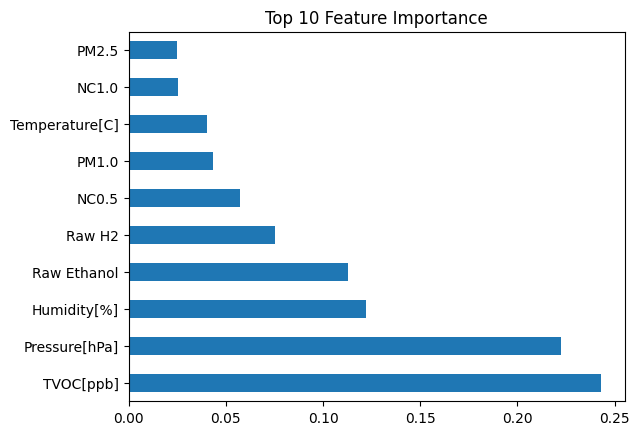

In [6]:
# Step 11: Define features and target variable
# Setting 'Fire Alarm' as the target and dropping unnecessary columns
X = data.drop(['Unnamed: 0', 'UTC', 'CNT', 'Fire Alarm'], axis=1)  # Features
y = data['Fire Alarm']  # Target

# Step 12: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 13: Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 14: Display the feature importance
import matplotlib.pyplot as plt

feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00     13354

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



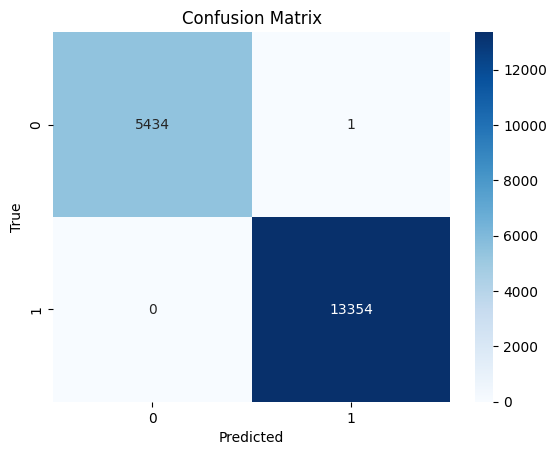

In [7]:
# Step 15: Predict on the test set
y_pred = clf.predict(X_test)

# Step 16: Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 17: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [9]:
# Step 20: Save the model using joblib
import joblib

# Save the trained model as a .pkl file
joblib.dump(clf, 'smoke_detection_model.pkl')

# To load the model later:
# model = joblib.load('smoke_detection_model.pkl')


['smoke_detection_model.pkl']